# LAB-01 
# -----------------------------------------------------------------------------
# DATE - 2nd/August/2024
# -----------------------------------------------------------------------------

### PEOPLE CHARMCASE DATASET

In [27]:
pwd

'C:\\Users\\Sujith Bayari\\OneDrive - Amrita Vishwa Vidyapeetham\\Machine_Learning_Lab'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("D:/MACHINE LEARNING DS73/PeopleCharmcase.csv")
df


,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [8]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

<Axes: >

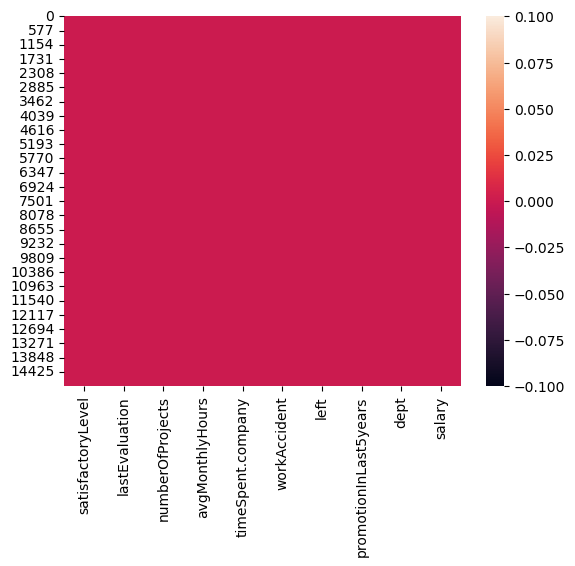

In [16]:
import seaborn as sns
sns.heatmap(df.isnull())

In [22]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

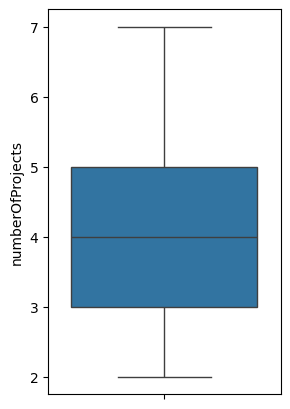

In [66]:
plt.figure(figsize=(3, 5))
sns.boxplot(df["numberOfProjects"])
plt.show()

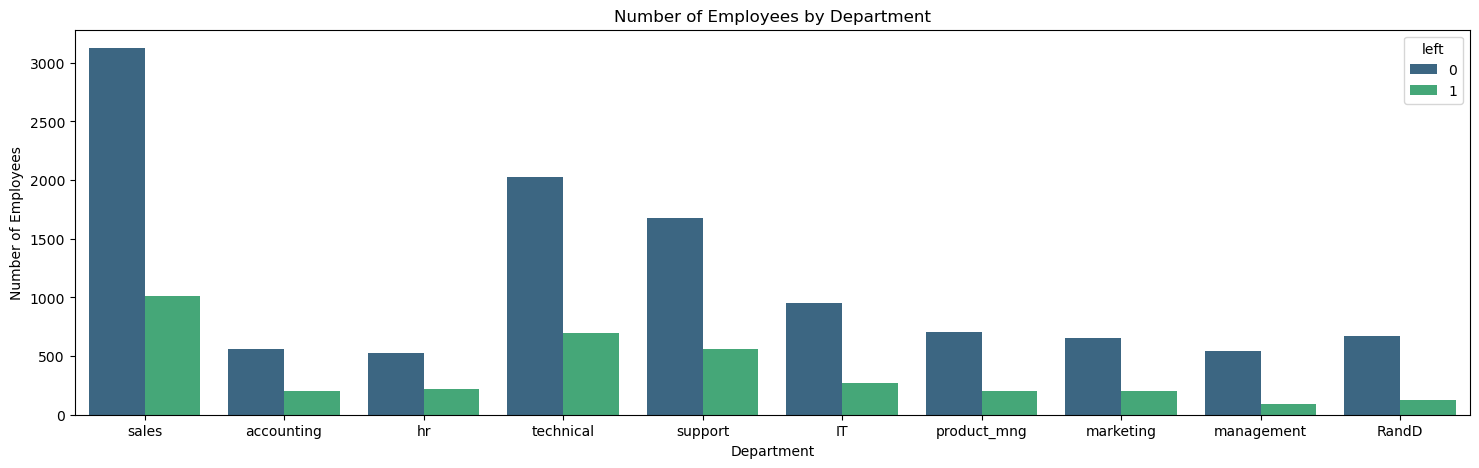

In [62]:
### 1. Bar Plot for Number of Employees by Department
plt.figure(figsize=(18, 5))
sns.countplot(x='dept', data=df, palette='viridis',hue='left')
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()


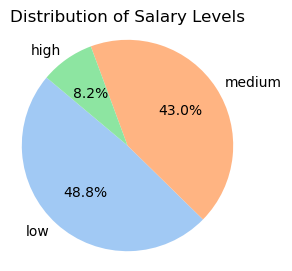

In [70]:
### 6. Pie Chart for Salary Distribution
salary_counts = df['salary'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(salary_counts, labels=salary_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Salary Levels')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

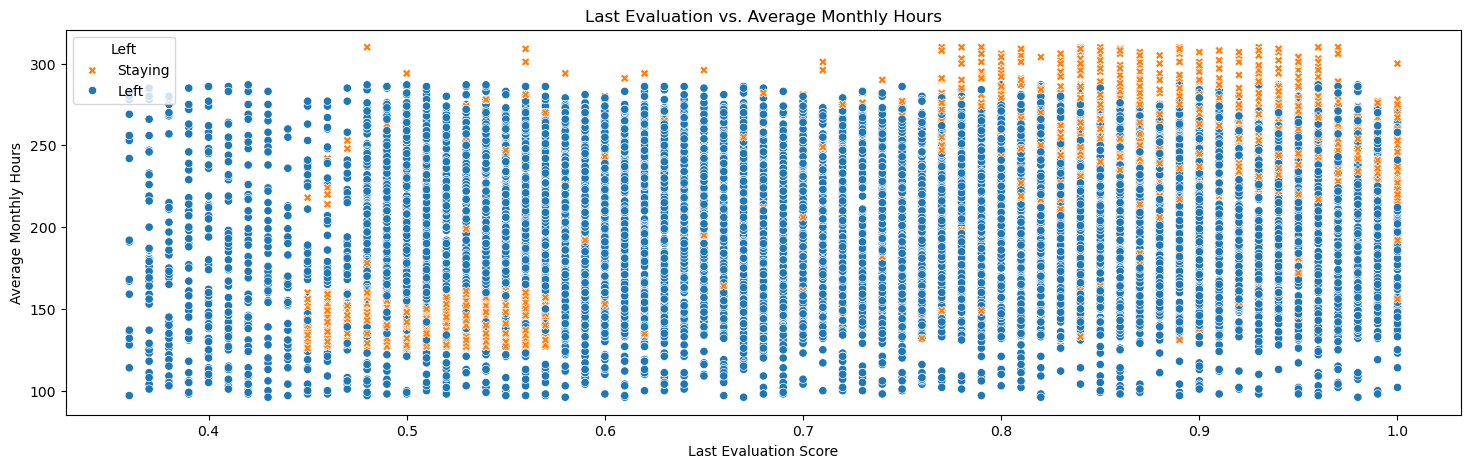

In [76]:
### 4. Scatter Plot for Last Evaluation vs. Average Monthly Hours
plt.figure(figsize=(18, 5))
sns.scatterplot(x='lastEvaluation', y='avgMonthlyHours', data=df, hue='left', style='left', markers={0: 'o', 1: 'X'})
plt.title('Last Evaluation vs. Average Monthly Hours')
plt.xlabel('Last Evaluation Score')
plt.ylabel('Average Monthly Hours')
plt.legend(title='Left', labels=['Staying', 'Left'])
plt.show()

STANDARD DEVIATION

In [33]:
stdv=df["numberOfProjects"].std()
stdv

1.2325923553183638

K- MEANS

In [84]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [86]:
df["dept"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [118]:
df['dept'] = df['dept'].astype('category')
df['salary'] = df['salary'].astype('category')

In [120]:
df['dept']=df['dept'].cat.codes
df['salary'] = df['salary'].cat.codes

In [102]:
df['dept'].unique()

array([7, 2, 3, 9, 8, 0, 6, 5, 4, 1], dtype=int8)

In [122]:
km = KMeans(n_clusters=3)
km.cluster_centers_scaler=MinMaxScaler()

In [124]:
scaler=MinMaxScaler()

In [126]:
scaler.fit(df[['dept']])
df['Age']= scaler.transform(df[['dept']])
scaler.fit(df[['salary']])
df['salary']= scaler.transform(df[['salary']])
df.head()
y_predicted=km.fit_predict(df[['dept','salary']])
y_predicted

array([2, 2, 2, ..., 1, 2, 1])

In [128]:
df['cluster']=y_predicted
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary,Age,cluster
0,0.38,0.53,2,157,3,0,1,0,7,0.5,0.777778,2
1,0.80,0.86,5,262,6,0,1,0,7,1.0,0.777778,2
2,0.11,0.88,7,272,4,0,1,0,7,1.0,0.777778,2
3,0.37,0.52,2,159,3,0,1,0,7,0.5,0.777778,2
4,0.41,0.50,2,153,3,0,1,0,7,0.5,0.777778,2


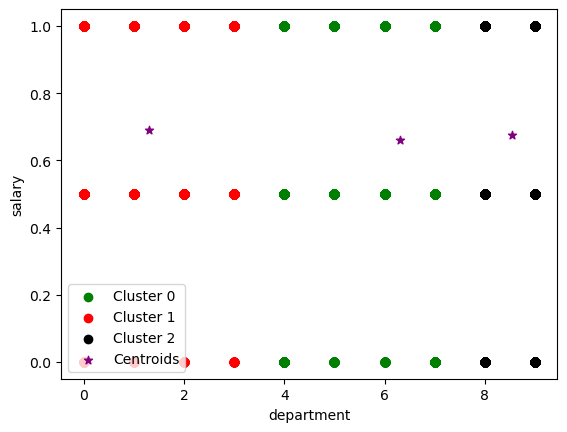

In [136]:
km = KMeans(n_clusters=3)  
km.fit(df[['dept', 'salary']])  

cluster_centers = km.cluster_centers_
df['cluster'] = km.labels_
df_cluster0 = df[df['cluster'] == 0]
df_cluster1 = df[df['cluster'] == 1]
df_cluster2 = df[df['cluster'] == 2]
plt.scatter(df_cluster0['dept'], df_cluster0['salary'], color='green', label='Cluster 0')
plt.scatter(df_cluster1['dept'], df_cluster1['salary'], color='red', label='Cluster 1')
plt.scatter(df_cluster2['dept'], df_cluster2['salary'], color='black', label='Cluster 2')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='purple', marker='*', label='Centroids')
plt.xlabel('department')
plt.ylabel('salary')
plt.legend()
plt.show()

.

# FIND S-ALGORITHM

### BOOK1 DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
df1=pd.read_csv("D:/MACHINE LEARNING DS73/Book1.csv")

In [150]:
df1

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,warm,normal,strong,yes
1,sunny,warm,high,strong,yes
2,rainy,cold,high,strong,no
3,sunny,warm,normal,moderate,yes
4,rainy,warm,normal,moderate,no


In [162]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      5 non-null      object
 1   Temperature  5 non-null      object
 2   Humidity     5 non-null      object
 3   Wind         5 non-null      object
 4   Play         5 non-null      object
dtypes: object(5)
memory usage: 332.0+ bytes


In [164]:
for i in df1.columns:
    print(i,':',df1[i].unique())

Outlook : ['sunny' 'rainy']
Temperature : ['warm' 'cold']
Humidity : ['normal' 'high']
Wind : ['strong' 'moderate']
Play : ['yes' 'no']


In [168]:
target=df1["Play"].values
target

array(['yes', 'yes', 'no', 'yes', 'no'], dtype=object)

In [178]:
concepts=df1[df1.columns[df1.columns!="Play"]].values
concepts

array([['sunny', 'warm', 'normal', 'strong'],
       ['sunny', 'warm', 'high', 'strong'],
       ['rainy', 'cold', 'high', 'strong'],
       ['sunny', 'warm', 'normal', 'moderate'],
       ['rainy', 'warm', 'normal', 'moderate']], dtype=object)

In [180]:
initial_hypothesis=["0"]*concepts.shape[1]
initial_hypothesis

['0', '0', '0', '0']

In [225]:
rows,columns=concepts.shape
def find_s(initial_hypothesis):
    for i in range(rows):
        if target[i]=="yes":
            for j in range(columns):
                if initial_hypothesis[j]=="0":
                    initial_hypothesis[j]=concepts[i][j]
                elif initial_hypothesis[j]!=concepts[i][j]:
                    initial_hypothesis[j]='?'
        print('step',i+1,':hypothesis',initial_hypothesis)
    return initial_hypothesis

In [229]:
final_hypothesis=find_s(initial_hypothesis)
print("final hypothesis i:",final_hypothesis)

step 1 :hypothesis ['sunny', 'warm', 'normal', 'strong']
step 2 :hypothesis ['sunny', 'warm', '?', 'strong']
step 3 :hypothesis ['sunny', 'warm', '?', 'strong']
step 4 :hypothesis ['sunny', 'warm', '?', '?']
step 5 :hypothesis ['sunny', 'warm', '?', '?']
final hypothesis i: ['sunny', 'warm', '?', '?']


---------------------------------

### BOOK2 DATASET

In [234]:
df1=pd.read_csv("D:/MACHINE LEARNING DS73/Book2.csv")

In [236]:
df1

,example,color,toughness,fungus,appearance,poisonous
0,1,green,hard,no,wrinkeld,yes
1,2,green,hard,yes,smooth,no
2,3,brown,soft,no,wrinkeld,no
3,4,orange,hard,no,wrinkeld,yes
4,5,green,soft,yes,smooth,yes
5,6,green,hard,yes,wrinkeld,yes
6,7,orange,hard,no,wrinkeld,yes


In [238]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   example     7 non-null      int64 
 1   color       7 non-null      object
 2   toughness   7 non-null      object
 3   fungus      7 non-null      object
 4   appearance  7 non-null      object
 5   poisonous   7 non-null      object
dtypes: int64(1), object(5)
memory usage: 468.0+ bytes


In [240]:
for i in df1.columns:
    print(i,':',df1[i].unique())

example : [1 2 3 4 5 6 7]
color : ['green' 'brown' 'orange']
toughness : ['hard' 'soft']
fungus : ['no' 'yes']
appearance : ['wrinkeld' 'smooth']
poisonous : ['yes' 'no']


In [252]:
target=df1["poisonous"].values
target

array(['yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [254]:
concepts=df1[df1.columns[df1.columns!="poisonous"]].values
concepts

array([[1, 'green', 'hard', 'no', 'wrinkeld'],
       [2, 'green', 'hard', 'yes', 'smooth'],
       [3, 'brown', 'soft', 'no', 'wrinkeld'],
       [4, 'orange', 'hard', 'no', 'wrinkeld'],
       [5, 'green', 'soft', 'yes', 'smooth'],
       [6, 'green', 'hard', 'yes', 'wrinkeld'],
       [7, 'orange', 'hard', 'no', 'wrinkeld']], dtype=object)

In [256]:
initial_hypothesis=["0"]*concepts.shape[1]
initial_hypothesis

['0', '0', '0', '0', '0']

In [258]:
rows,columns=concepts.shape
def find_s(initial_hypothesis):
    for i in range(rows):
        if target[i]=="yes":
            for j in range(columns):
                if initial_hypothesis[j]=="0":
                    initial_hypothesis[j]=concepts[i][j]
                elif initial_hypothesis[j]!=concepts[i][j]:
                    initial_hypothesis[j]='?'
        print('step',i+1,':hypothesis',initial_hypothesis)
    return initial_hypothesis

In [260]:
final_hypothesis=find_s(initial_hypothesis)
print("final hypothesis i:",final_hypothesis)

step 1 :hypothesis [1, 'green', 'hard', 'no', 'wrinkeld']
step 2 :hypothesis [1, 'green', 'hard', 'no', 'wrinkeld']
step 3 :hypothesis [1, 'green', 'hard', 'no', 'wrinkeld']
step 4 :hypothesis ['?', '?', 'hard', 'no', 'wrinkeld']
step 5 :hypothesis ['?', '?', '?', '?', '?']
step 6 :hypothesis ['?', '?', '?', '?', '?']
step 7 :hypothesis ['?', '?', '?', '?', '?']
final hypothesis i: ['?', '?', '?', '?', '?']


-----------------------------------------------